## Installing libraries

In [145]:
# ! pip install jupyter-lab
# ! pip install jupyterlab_sql
# ! jupyter lab build
# ! pip install scrapy
# ! pip install sqlalchemy

In [2]:
# https://github.com/vega/ipyvega/blob/master/notebooks/VegaLite.ipynb

## Importing libs

In [88]:
import requests
from scrapy import Selector
from bs4 import BeautifulSoup as bs
import pandas as pd

#### install chrome extension
* https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb?hl=en

## Jupyter Lab
* https://www.datacamp.com/community/tutorials/sql-interface-within-jupyterlab

# Scrapy

## Selectors

In [10]:
url = 'http://quotes.toscrape.com'

In [35]:
quotes = requests.get(url).content

In [36]:
sel_quotes = Selector(text=quotes)

In [37]:
type(sel_quotes)

scrapy.selector.unified.Selector

In [38]:
# print all the elements
len(sel_quotes.xpath('//*'))

151

In [17]:
# sel.css()
# sel.xpath()

In [39]:
sel_quotes.xpath('//*[contains(concat( " ", @class, " " ), concat( " ", "author", " " ))]//text()').extract()

['Albert Einstein',
 'J.K. Rowling',
 'Albert Einstein',
 'Jane Austen',
 'Marilyn Monroe',
 'Albert Einstein',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin']

In [79]:
news = sel_quotes.css('.text::text').extract()

In [81]:
news

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
 '“Try not to become a man of success. Rather become a man of value.”',
 '“It is better to be hated for what you are than to be loved for what you are not.”',
 "“I have not failed. I've just found 10,000 ways that won't work.”",
 "“A woman is like a tea bag; you never know how strong it is until it's in hot water.”",
 '“A day without sunshine is like, you know, night.”']

### Translate xpath to CSS

In [20]:
# Create the XPath string equivalent to the CSS Locator 
xpath = '/html/body/span[1]//a'

# Create the CSS Locator string equivalent to the XPath
css_locator = 'html > body > span:nth-of-type(1) a'

In [21]:
# Create the XPath string equivalent to the CSS Locator 
xpath = '//div[@id="uid"]/span//h4'

# Create the CSS Locator string equivalent to the XPath
css_locator = 'div#uid > span h4'

### Exemplo

In [281]:
uol_link = 'https://www.uol.com.br/'

In [282]:
uol = requests.get(uol_link).content

In [283]:
uol_sel = Selector(text=uol)

In [284]:
news = uol_sel.css('.color2::text').extract()

In [285]:
news

['Para ala do STF, prisões não diminuem a gravidade de diálogos de Moro ',
 'Amigo hacker queria vender dados de Moro ao PT, diz defesa de DJ preso ',
 'Defesa de supostos hackers diz que movimentação de R$ 627 mil é natural ',
 'Casa vigiada por câmera em Araraquara (SP) é apontada como origem de ataque ',
 'Enterros, buscas e pagamentos impedem Brumadinho de deixar tragédia para trás ',
 'Começam hoje dois pagamentos diferentes do PIS; veja se tem direito ',
 "'Estou chocada com o presidente', diz Janaina Paschoal sobre Bolsonaro ",
 'Procuradoria investigará policiais que interromperam ativistas anti-Bolsonaro ',
 "Jesus encara primeiras 'cornetas' no Flamengo e ganha mais um problema ",
 'Diego sofre fratura no tornozelo em derrota na Libertadores ',
 'Mauro Cezar: Jesus comete primeiro grande pecado no Fla ',
 'Orange Is The New Black: entre altos e baixos, chega ao fim o 1º fenômeno da Netflix ',
 'BR Distribuidora não tem controlador definido ',
 'Vai sacar dinheiro do FGTS? Vej

## A little bit of text processing

In [286]:
# visualize the most mentioned features

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

def word_cloud_figure(col,
            max_words=None,
            background_color='white',
            stopwords=None):
    string_text = str(col)
    wordCloud = WordCloud(max_words=max_words,
                        repeat=False,
                        stopwords=stopwords,
                        background_color=background_color
                        ).generate(string_text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
    return(plt.show())

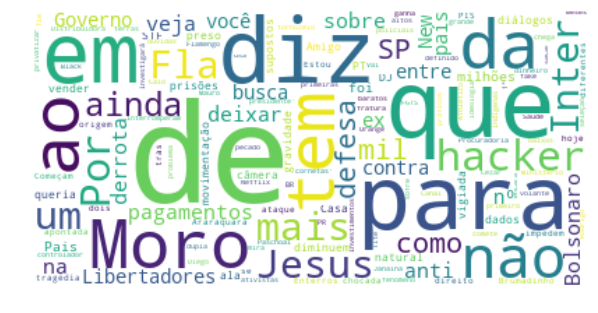

In [287]:
word_cloud_figure(news)

#### pygsheets

In [288]:
import pygsheets
from nltk.corpus import stopwords

def stop_words_gsheet():
    url = '/Users/liviaclarete/gdrive/code/functions/gdocs/googleKey_pesq7/client_secret.json'
    # reading stopwords from a google sheet
    gc = pygsheets.authorize(client_secret=url)
    # Open spreadsheet and then workseet
    sh = gc.open('stopwords_pt')
    wks = sh.sheet1
    # get the values
    stopwords_m = wks.get_all_values(returnas='matrix')
    # create a list with stopwords
    sheet_stopwords = [i[0] for i in stopwords_m]
    # loading nltk stopwords
    stop = stopwords.words('portuguese')
    stopwords_total = stop + sheet_stopwords
    return(stop)

In [289]:
# https://docs.google.com/spreadsheets/d/1GLMt63E9a-EdT-_igqXDvrLb4tf64bW_LTRLSFP2JbQ/edit#gid=1713228162

In [290]:
stwords = stop_words_gsheet()

In [295]:
stwords = stwords + ['do', 'no', 'a', 'o', 'com', 'por', 'em', 'de', 'sobre', 'diz', 'da', 'é', 'como', 'que', 'dentro', 'Após', 'diz', 'Entenda', 'dentro', 'ainda']

In [296]:
stwords[0]

'de'

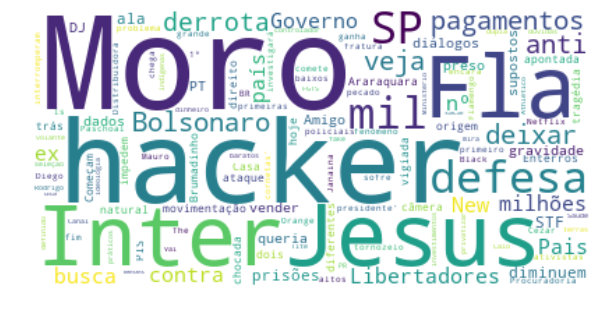

In [297]:
word_cloud_figure(news, stopwords=stwords)

### pre-processing

In [298]:
news_df = pd.DataFrame(news)

In [299]:
news_df.columns = ['news']

In [300]:
stwords = stwords

In [301]:
def pre_processing_col(col, stopwords=stwords):
    # transform the words into lower case
    col = col.apply(lambda x: x.lower())
    # removing punctuation
    col = col.str.replace('[^\w\s]', '')
    # removing numbers
    col = col.apply(
    # iterate through each item in a returns a list of words and joins the split words into a sentence again
    lambda x:' '.join([x for x in x.split() if not x.isdigit()]))
    # stopwords
    # removing stopwords
    col = col.apply(lambda x: ' '.join([x for x in x.split() if x not in stopwords]))
    return(col)

<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<ipython-input-301-f076cf56c5d8>:5: DeprecationWarning: invalid escape sequence \w
  col = col.str.replace('[^\w\s]', '')


In [302]:
news_df['news_clean'] = pre_processing_col(news_df.news)

In [303]:
from textblob import TextBlob

# tokenize words from the text
def tokenization(col):
    serie = pd.Series(col.apply(lambda x:x.split()))
    return(serie)

In [304]:
news_df['token'] = tokenization(news_df.news_clean)

In [305]:
news_df.head()

,news,news_clean,token
0,"Para ala do STF, prisões não diminuem a gravid...",ala stf prisões diminuem gravidade diálogos moro,"[ala, stf, prisões, diminuem, gravidade, diálo..."
1,Amigo hacker queria vender dados de Moro ao PT...,amigo hacker queria vender dados moro pt defes...,"[amigo, hacker, queria, vender, dados, moro, p..."
2,Defesa de supostos hackers diz que movimentaçã...,defesa supostos hackers movimentação r mil nat...,"[defesa, supostos, hackers, movimentação, r, m..."
3,Casa vigiada por câmera em Araraquara (SP) é a...,casa vigiada câmera araraquara sp apontada ori...,"[casa, vigiada, câmera, araraquara, sp, aponta..."
4,"Enterros, buscas e pagamentos impedem Brumadin...",enterros buscas pagamentos impedem brumadinho ...,"[enterros, buscas, pagamentos, impedem, brumad..."


In [306]:
import gensim
from gensim import corpora


# Creating a term dictionary of the text corpus
dictionary = corpora.Dictionary(news_df.token)

# creating a Document Text Matrix with the dictionary
doc_term_matrix = [dictionary.doc2bow(i) for i in token_news]


In [310]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=3, 
                random_state=100)

In [311]:
# Printing the topics
lda_model.print_topics()

[(0,
  '0.019*"técnica" + 0.012*"hacker" + 0.011*"defesa" + 0.011*"preso" + 0.011*"vender" + 0.011*"queria" + 0.011*"dados" + 0.011*"usada" + 0.011*"invadir" + 0.011*"estudo"'),
 (1,
  '0.012*"tuíte" + 0.012*"erros" + 0.012*"demissão" + 0.012*"couberam" + 0.011*"fala" + 0.011*"pode" + 0.011*"melhor" + 0.011*"dinheiro" + 0.011*"hacker" + 0.011*"faz"'),
 (2,
  '0.013*"esperança" + 0.013*"defesa" + 0.012*"recuperar" + 0.012*"farão" + 0.012*"imagens" + 0.012*"contra" + 0.012*"governo" + 0.011*"pede" + 0.011*"dois" + 0.005*"veja"')]

In [312]:
import pyLDAvis
import pyLDAvis.gensim

# Downalod dictionaries from spacy -- lemmatization
# !python -m spacy download en # one time run
# !python -m spacy download pt # one time run

import matplotlib.pyplot as plt
import seaborn as sns

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.022755 -0.002161       1        1  47.840202
1      0.014539 -0.010586       2        1  28.277605
2      0.008216  0.012748       3        1  23.882195, topic_info=     Category      Freq         Term     Total  loglift  logprob
term                                                            
267   Default  0.000000    esperança  0.000000  30.0000  30.0000
270   Default  0.000000    recuperar  0.000000  29.0000  29.0000
268   Default  0.000000        farão  0.000000  28.0000  28.0000
269   Default  0.000000      imagens  0.000000  27.0000  27.0000
149   Default  0.000000       contra  0.000000  26.0000  26.0000
115   Default  0.000000      governo  0.000000  25.0000  25.0000
165   Default  0.000000        tuíte  0.000000  24.0000  24.0000
162   Default  0.000000        erros  0.000000  23.0000  23.0000
276   Default  0.000000     demissão  0.000000  22.0000  22.0000
256   Default  0.000000         pede  0.000000  21.0000  21.0000
41    Default  0.000000         dois  0.000000  20.0000  20.0000
161   Default  0.000000     couberam  0.000000  19.0000  19.0000
169   Default  0.000000      técnica  0.000000  18.0000  18.0000
278   Default  0.000000         fala  0.000000  17.0000  17.0000
134   Default  0.000000         pode  0.000000  16.0000  16.0000
93    Default  0.000000     dinheiro  0.000000  15.0000  15.0000
186   Default  0.000000          faz  0.000000  14.0000  14.0000
124   Default  0.000000       melhor  0.000000  13.0000  13.0000
25    Default  0.000000         casa  0.000000  12.0000  12.0000
44    Default  0.000000         veja  0.000000  11.0000  11.0000
9     Default  0.000000       defesa  0.000000  10.0000  10.0000
145   Default  0.000000           nº  0.000000   9.0000   9.0000
31    Default  0.000000       buscas  0.000000   8.0000   8.0000
273   Default  0.000000    esquecida  0.000000   7.0000   7.0000
12    Default  0.000000        preso  0.000000   6.0000   6.0000
15    Default  0.000000       vender  0.000000   5.0000   5.0000
14    Default  0.000000       queria  0.000000   4.0000   4.0000
8     Default  0.000000        dados  0.000000   3.0000   3.0000
11    Default  0.000000       hacker  0.000000   2.0000   2.0000
168   Default  0.000000      invadir  0.000000   1.0000   1.0000
...       ...       ...          ...       ...      ...      ...
44     Topic3  0.050306         veja  0.263109  -0.2224  -5.3862
25     Topic3  0.048475         casa  0.263460  -0.2608  -5.4233
106    Topic3  0.035395  athleticopr  0.139411   0.0612  -5.7378
186    Topic3  0.047946          faz  0.263041  -0.2702  -5.4343
93     Topic3  0.047645     dinheiro  0.262725  -0.2753  -5.4406
134    Topic3  0.045843         pode  0.263301  -0.3160  -5.4791
17     Topic3  0.048600          mil  0.313281  -0.4314  -5.4207
273    Topic3  0.045831    esquecida  0.276054  -0.3636  -5.4794
124    Topic3  0.044873       melhor  0.264814  -0.3432  -5.5005
84     Topic3  0.035395      netflix  0.139411   0.0612  -5.7378
83     Topic3  0.035395           is  0.139411   0.0612  -5.7378
77     Topic3  0.035395        altos  0.139411   0.0612  -5.7378
78     Topic3  0.035395       baixos  0.139411   0.0612  -5.7378
31     Topic3  0.044571       buscas  0.267885  -0.3614  -5.5073
81     Topic3  0.035395     fenômeno  0.139411   0.0612  -5.7378
145    Topic3  0.043861           nº  0.266676  -0.3730  -5.5233
79     Topic3  0.035395        black  0.139411   0.0612  -5.7378
278    Topic3  0.043183         fala  0.263686  -0.3773  -5.5389
11     Topic3  0.049543       hacker  0.452040  -0.7789  -5.4015
276    Topic3  0.040279     demissão  0.262000  -0.4405  -5.6085
27     Topic3  0.040915       origem  0.320995  -0.6279  -5.5929
188    Topic3  0.040838          mal  0.319716  -0.6258  -5.5948
161    Topic3  0.038894     couberam  0.263250  -0.4802  -5.6435
123    Topic3  0.035395      confira  0.139411 

## Scrapy shell: test selectors

* ! scrapy shell 'http://quotes.toscrape.com'
* ! fetch('http://quotes.toscrape.com')
* ! response.css()

## Scrapy flow

Terminal
* ! scrapy startproject __project_name__
* ! cd __project_name__
* scrapy genspider __spider_name__ __url_to_be_scraped__
* Go to the 'spider' folder
* scrapy genspider __spider_name__ 'www.page.com'
>* Open the spider spider_file.py
>* Modify the file
* scrapy runspider spider_file.py -o file.csv 

├── scrapy.cfg                # deploy configuration file
└── scrapy_spider             # project's Python module, you'll import your code from here
    ├── __init__.py
    ├── items.py              # project items definition file
    ├── middlewares.py        # project middlewares file
    ├── pipelines.py          # project pipeline file
    ├── settings.py           # project settings file
    └── spiders               # a directory where spiders are located
        ├── __init__.py
        └── example.py        # spider we just created

In [314]:
# -*- coding: utf-8 -*-
import scrapy

class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        pass

Spider paramethers

* name: identifies the Spider. It must be unique within a project

* start_urls: The list of the feed URLs, the spider would start by crawling the feed URLs.

* allowed_domains: This setting is useful for broad crawls, if the domain of the URL is not in this setting, then the URL would be ignored.

* parse: a method that will be called to handle the response downloaded for each of the requests made.

In [316]:
import scrapy

class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        quotes = response.xpath("//div[@class='quote']//span[@class='text']/text()").extract()
        yield {'quotes': quotes}

In [328]:
path = '/Users/liviaclarete/Documents/june2019-ft/quotes/quotes/spiders/' 

In [336]:
quotes_1_path = path + 'quotes.csv'

In [337]:
quotes = pd.read_csv(quotes_1, sep=',')

In [338]:
quotes

,quotes
0,“The world as we have created it is a process ...


In [348]:
class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        quotes = response.xpath("//div[@class='quote']")
        for quote in quotes:
            text = quote.xpath(
                ".//span[@class='text']/text()").extract_first()
            author = quote.xpath(
                ".//small//text()").extract_first()
            yield {'quote': text, "author": author}

In [344]:
quotes_2_path = path + 'quotes_2.csv'

In [345]:
quotes2 = pd.read_csv(quotes_2_path)

In [347]:
quotes2

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin


In [349]:
class QuotesSpiderSpider(scrapy.Spider):
    name = 'quotes_spider'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        quotes = response.xpath("//div[@class='quote']")
        for quote in quotes:
            text = quote.xpath(
                ".//span[@class='text']/text()").extract_first()
            author = quote.xpath(
                ".//small//text()").extract_first()
            yield {'quote': text, "author": author}

        next_page_url = response.xpath("//li[@class='next']//a/@href").extract_first()
        if next_page_url:
            absolute_next_page_url = response.urljoin(next_page_url)
            yield scrapy.Request(absolute_next_page_url)

In [350]:
quotes_3_path = path + 'quotes_3.csv'

In [351]:
quotes3 = pd.read_csv(quotes_3_path)

In [352]:
quotes3

,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe
5,“Try not to become a man of success. Rather be...,Albert Einstein
6,“It is better to be hated for what you are tha...,André Gide
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin
